# NYC Rental Listing Inquiries

## Problem Description
* Renting an apartment, especially in NYC, can be stressful and difficult. Can we use data and ML tools to enhance the experience for all parties involved, i.e. renter, owner, and agent.
* Can we classify or predict the **quality** or **interest level** of a rental listing based off various attributes?
* Based on a competition that may be seen <a href="https://www.kaggle.com/c/two-sigma-connect-rental-listing-inquiries#description">here</a>
* For example, <a href="https://www.renthop.com/">RentHop</a>, which is an NYC apartment-searching service, has a web-based predictive solution that categorizes and ranks apartments based on a variety of features

## Goal
* Explore and analyze rental listing data in order to **assign an interest level (low, medium, or high) to a new rental listing**, i.e. we are interested in the number of inquiries a new rental listing will receive based on various features/attributes of the listing. 
* This is a **multi-class classification** problem 
* Importance:
    1. provide high-quality apartments, which makes the customer happy in addition to the listing-company and owner (win-win-win)
    2. prevent fraudulent listings
    3. identify potential listing quality issues
    4. allow owners and agents to better understand renter's needs and preferences
    
## Table of Contents
1. [Data Exploration](#data_exploration)
    1. [Target Variable - Interest Level](#target_variable)
    2. [Geographic Representation](#geo)
    3. [Listing Price](#price)
    4. [Number of Bedrooms](#bedrooms)
    5. [Number of Bathrooms](#bathrooms)
    6. [List ID](#listID)
2. [Feature Engineering](#feature_engineer)
    1. [Number of Listing Photos](#photos)
    2. [Numer of Listing Features](#list_features)
    3. [Listing Hour](#listing_hour)
    4. [Number of Descriptive Words](#descriptive)
    5. [Managers](#managers)

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import geopandas as gpd 
import seaborn as sns
color = sns.color_palette()
import warnings
warnings.filterwarnings('ignore')

In [78]:
train = pd.read_json('data/train.json')
test = pd.read_json("data/test.json")
print("Train rows,cols = %d, %d" % (train.shape[0], train.shape[1]))
print("Test  rows,cols = %d, %d" % (test.shape[0], test.shape[1]))

Train rows,cols = 49352, 15
Test  rows,cols = 74659, 14


# Initial Data Exploration <a class="anchor" id="data_exploration"></a>

In [79]:
train.tail().T

,9999,99991,99992,99993,99994
bathrooms,1,1,1,1,1
bedrooms,2,1,1,0,2
building_id,297160caf8a88c10718b492d4672c6b4,9e871ccfea7b07686c101548ca693af6,7967a1280bf3f7644500fc79d2696b0e,ad67f6181a49bde19218929b401b31b7,5173052db6efc0caaa4d817112a70f32
created,2016-06-02 05:41:05,2016-04-04 18:22:34,2016-04-16 02:13:40,2016-04-08 02:13:33,2016-04-12 02:48:07
description,"30TH/3RD, MASSIVE CONV 2BR IN LUXURY FULL SERV...","HIGH END condo finishes, swimming pool, and ki...",Large Renovated One Bedroom Apartment with Sta...,Stylishly sleek studio apartment with unsurpas...,Look no further!!! This giant 2 bedroom apart...
display_address,E 30 St,Rector Pl,West 45th Street,Wall Street,Park Terrace East
features,"[Elevator, Laundry in Building, Laundry in Uni...","[Common Outdoor Space, Cats Allowed, Dogs Allo...","[Doorman, Elevator, Pre-War, Dogs Allowed, Cat...","[Doorman, Elevator, Pre-War, Dogs Allowed, Cat...",[Hardwood Floors]
interest_level,medium,low,low,low,low
latitude,40.7426,40.7102,40.7601,40.7066,40.8699
listing_id,7098690,6822449,6881461,6841891,6858245


### There are a number of features:
1. number of bathrooms
2. number of bedrooms
3. a building identification code
4. created - presumably when the listing was added to the website
5. listing description
6. display_address
7. a list of features about the apartment
8. **interest_level** (the target variable, 3 categories: high, med, low)
9. latitude
10. listing_id
11. longitude
12. manager_id
13. a list of photo links
14. price per month in USD
15. address

### many of which are of object type:

In [80]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49352 entries, 10 to 99994
Data columns (total 15 columns):
bathrooms          49352 non-null float64
bedrooms           49352 non-null int64
building_id        49352 non-null object
created            49352 non-null object
description        49352 non-null object
display_address    49352 non-null object
features           49352 non-null object
interest_level     49352 non-null object
latitude           49352 non-null float64
listing_id         49352 non-null int64
longitude          49352 non-null float64
manager_id         49352 non-null object
photos             49352 non-null object
price              49352 non-null int64
street_address     49352 non-null object
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


In [81]:
train.describe() # Obviously only works on numeric data => 6 features

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,4.935200e+04
mean,1.21218,1.541640,40.741545,7.024055e+06,-73.955716,3.830174e+03
std,0.50142,1.115018,0.638535,1.262746e+05,1.177912,2.206687e+04
min,0.00000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2.500000e+03
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3.150000e+03
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4.100000e+03
max,10.00000,8.000000,44.883500,7.753784e+06,0.000000,4.490000e+06


In [82]:
# Where on earth is the 4.49M listing..
#train.loc[train['price']>4.400000e+06].T

### How many nulls in the training sample

In [83]:
def check_nulls(data,more=False):
    print('Any nulls? %s \nIf so, how many? %d' % 
          ("True" if data.isnull().any().any() else "False",
           data.isnull().sum().sum()))
    if more:
        missing =data.apply(lambda x: sum(x.isnull()), axis = 0)
        print(missing)

In [84]:
check_nulls(train)

Any nulls? False 
If so, how many? 0


## Target Variable - Interest Level <a class="anchor" id="target_variable"></a>
* Uncovering information and correlations to be used in the model and feature selection
* General understanding of the data
* Our classes are **not balanced**

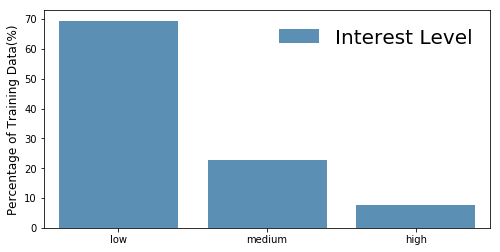

In [85]:
# Note this returns a series, which has index/value access
interest = train['interest_level'].value_counts()
plt.figure(figsize=(8,4))
N=100/sum(interest.values) # normalize to a percentage
sns.barplot(interest.index, N*interest.values, 
            alpha=0.8, color=color[0], label='Interest Level')
plt.ylabel('Percentage of Training Data(%)', fontsize=12)
plt.xlabel('', fontsize=12)
plt.legend(frameon=False, prop={'size':20})
plt.show()

## Geographic plot of NYC <a class="anchor" id="geo"></a>
* There are some zeros in the long/lat rows
* Let's extract the NYC shapemap, and then only plot listings that fit on to this long/lat space, otherwise the visualization looks poor. This removes round 0.2% of the training sample, which is negligible
* Downloaded the NYC Boroughs from <a href="https://geodata.lib.berkeley.edu/catalog/nyu_2451_34490">here</a> in GeoJSON format

In [86]:
# I do not need to copy the whole dataframe, that is a waste. Let's grab 
# a subset
cols = ('price', 'interest_level', 'latitude', 'longitude')
tempdf = train.loc[(train['latitude'] > 40.5) & (train['latitude'] < 40.9) & (train['longitude'] > -74.2) & (train['longitude'] < -73.7),cols]

In [87]:
# Extract the information to be plotted
lat      = tempdf['latitude'].values
lon      = tempdf['longitude'].values
avgp  = sum(tempdf['price'].values)/len(tempdf['price'].values)
price = tempdf['price']/avgp
print('Original size, new size, ratio = %d, %d, %1.3f' % 
      (train.shape[0], tempdf.shape[0], tempdf.shape[0]/train.shape[0] ))
print('Avg price = $%1.3f' % avgp)

Original size, new size, ratio = 49352, 49276, 0.998
Avg price = $3830.490


In [88]:
# Let's categorize the interest variable
interest = tempdf['interest_level'].values
interest_cat = []
interest_dict = {'low':0, 'medium':1, 'high':2 }
for i in interest:
    if i in interest_dict:
        interest_cat.append(interest_dict[i])
    else:
        print('Error: The key does not exist, something is strange')

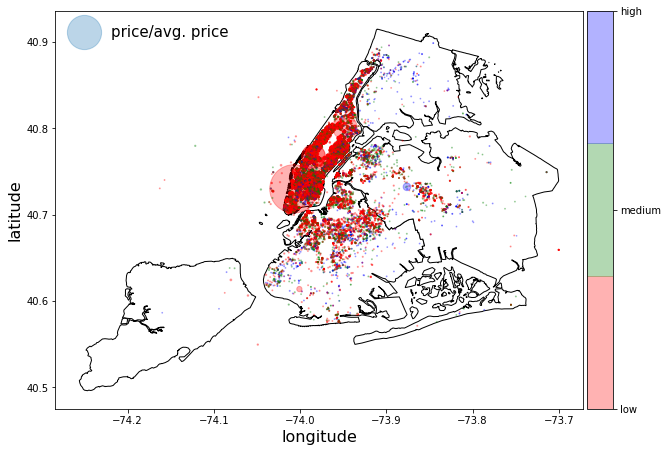

In [89]:
# Let's make a NYC map using GeoPandas
from mpl_toolkits.axes_grid1 import make_axes_locatable
map_df = gpd.read_file('data/nyu_2451_34490-geojson.json')
plt.figure(figsize=(10,9))
ax = plt.gca()

cmap = colors.ListedColormap(['r','g','b'])
map_df.plot(ax=ax, color='white', edgecolor='black')
plt.scatter(x=lon, y=lat, alpha=0.3, s=2*price,
           label='price/avg. price', c=interest_cat, cmap=cmap)
plt.xlabel('longitude',fontsize=16)
plt.ylabel('latitude',fontsize=16)
plt.legend(frameon=False, loc='upper left', prop={'size':15})

# Handle the colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
clb = plt.colorbar(cmap=cmap, cax=cax)
clb.set_ticks([0,1,2])
clb.ax.set_yticklabels(['low', 'medium', 'high'])

plt.show()

#### Fig. This is roughly 99.8% of the training sample, we see we have some listings in all 5 Boroughs in addition to the Jersey side. There is 1 outlier circle, which is a result of a listing that is \$4,490,000

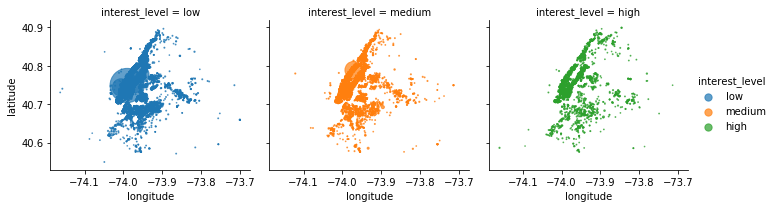

In [90]:
# Let's organize the above by interest_level, see if anything is strange
g = sns.FacetGrid(tempdf, col='interest_level', 
                  col_order=['low','medium','high'],
                  hue_order=['low','medium','high'],
                  hue='interest_level', aspect=1.1)
g.map(plt.scatter, 'longitude', 'latitude', 
      alpha=.7, s=price)
g.add_legend(frameon=False, markerscale=0.3)
plt.show()

## Listing Price <a class="anchor" id="price"></a>
* We already know that some outliers exist
* Let's first check the behavior between the interest level vs price distributions
* Let's define a cut selection to discard price outliers, and then check the distributions again

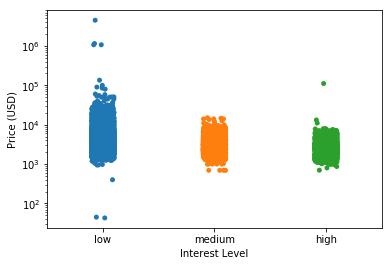

In [91]:
ax=plt.gca()
sns.stripplot(train["interest_level"], train["price"], 
              order=['low','medium','high'], jitter=True)
ax.set_yscale('log')
ax.set_xlabel('Interest Level')
ax.set_ylabel('Price (USD)')
plt.show()

>99.8th percentile: $22000.0
<0.01th percentile:  $695.0


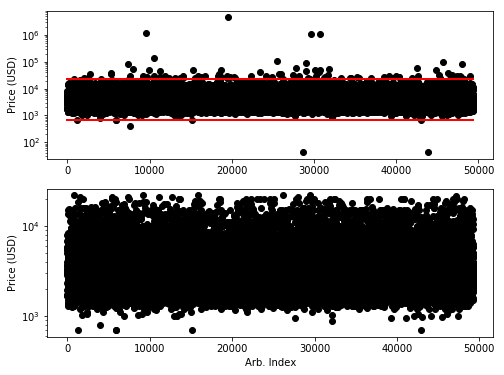

In [92]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8,6))
ax = plt.gca()
axes[0].scatter(range(train.shape[0]), train['price'], color='black',
           label='Listing')
axes[0].set_yscale('log')
axes[0].set_ylabel('Price (USD)')

# Let's remove these outliers as they are quite bad.. We will just use
# percentiles rather than using hard thresholds since if I keep re-running
# the notebook the percentile creep lower
#top_limit = np.percentile(train.price.values,99.8)
#low_limit = np.percentile(train.price.values,0.01)
top_limit = 22000
low_limit = 695
axes[0].plot([0, train.shape[0]], [top_limit, top_limit], 'k-', lw=2, color='r')
axes[0].plot([0, train.shape[0]], [low_limit, low_limit], 'k-', lw=2, color='r')
print('>99.8th percentile: $%1.1f' % top_limit)
print('<0.01th percentile:  $%1.1f' % low_limit)

#train['price']=train['price'].loc[train['price']<top_limit]
#train['price']=train['price'].loc[train['price']>low_limit]
train = train.drop(train[train['price'] > top_limit].index)
train = train.drop(train[train['price'] < low_limit].index)
axes[1].scatter(range(train.shape[0]), train['price'], color='black',
           label='Listing')
axes[1].set_yscale('log')
plt.xlabel('Arb. Index')
plt.ylabel('Price (USD)')
plt.show()

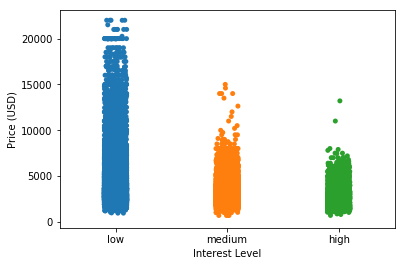

In [93]:
# Let's re-look at the interest level vs price
ax=plt.gca()
sns.stripplot(train["interest_level"],train["price"], 
              order=['low','medium','high'], jitter=True)
ax.set_xlabel('Interest Level')
ax.set_ylabel('Price (USD)')
plt.show()

## Intuition says bathroom/bedrooms is intimately tied to price which ultimately affects the interest level
* High interest will likely be fair/reasonable prices with great features (everyone wants a deal!) 

In [94]:
# Let's look at the correlation matrix
corr_mat = train.corr()
corr_mat['price'].sort_values(ascending=False)

price         1.000000
bathrooms     0.695112
bedrooms      0.522765
listing_id    0.011377
longitude     0.001489
latitude     -0.009923
Name: price, dtype: float64

In [95]:
#plt.figure(figsize=(10,8))
#plt.title('Pearson Correlation of Features', y=1.02, size=12)
#sns.heatmap(corr_mat,linewidths=0.1,vmax=1.0, square=True, 
#            cmap=plt.cm.plasma, linecolor='white', annot=True)
#plt.show()

## Number of Listing Bedrooms <a class="anchor" id="bedrooms"></a>

[]

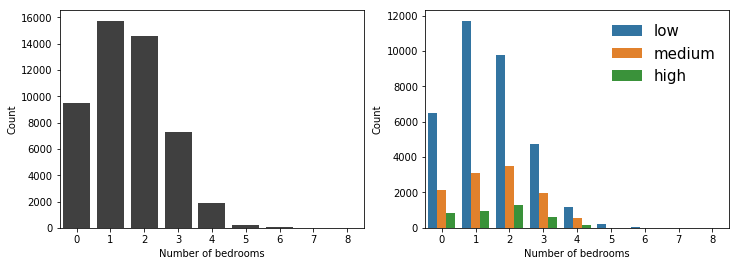

In [96]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
bedtemp = train['bedrooms'].value_counts()
sns.barplot(bedtemp.index, bedtemp.values, alpha=0.75, 
            ax=ax1, color='black')
ax1.set_xlabel('Number of bedrooms')
ax1.set_ylabel('Count')

sns.countplot(data=train, x='bedrooms', hue='interest_level',
              hue_order=['low','medium','high'],
              ax=ax2)
ax2.set_xlabel('Number of bedrooms')
ax2.set_ylabel('Count')
plt.legend(frameon=False, prop={'size':15}, loc='upper right')
plt.plot()

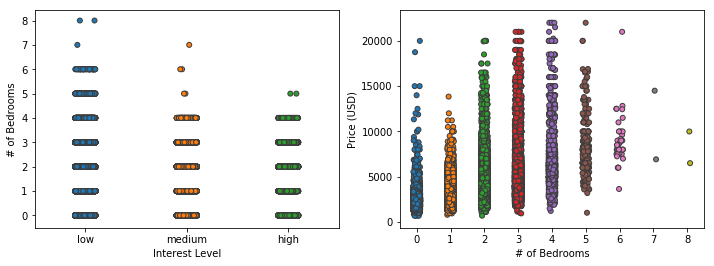

In [97]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))

sns.stripplot(train["interest_level"],train["bedrooms"], 
              order=['low','medium','high'], 
              jitter=True, linewidth=1, ax=ax1)
ax1.set_xlabel('Interest Level')
ax1.set_ylabel('# of Bedrooms')

sns.stripplot(train["bedrooms"],train["price"], 
              jitter=True, linewidth=1, ax=ax2)
ax2.set_xlabel('# of Bedrooms')
ax2.set_ylabel('Price (USD)')
plt.show()

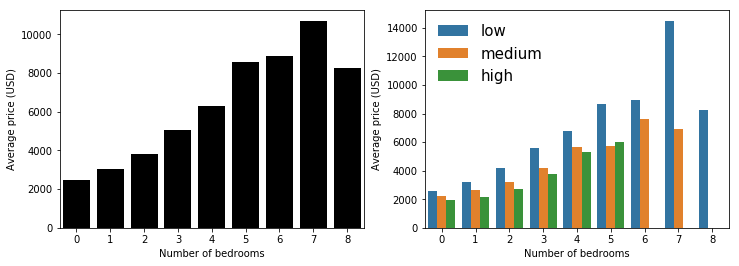

In [98]:
# Let's average the previous right-panel plot
f, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
d=train[['price','bedrooms']].groupby(['bedrooms'], as_index=False).mean()
sns.barplot(d['bedrooms'], d['price'], color='black', ax=ax1)
ax1.set_xlabel("Number of bedrooms")
ax1.set_ylabel('Average price (USD)')

d1=train[['price','bedrooms','interest_level']].groupby(['bedrooms','interest_level'], as_index=False).mean()
sns.barplot(data=d1, x='bedrooms',y='price', hue='interest_level', 
            hue_order=['low','medium','high'], ax=ax2)
ax2.set_xlabel('Number of bedrooms')
ax2.set_ylabel('Average price (USD)')
plt.legend(frameon=False,prop={'size':15})
plt.show()

### Bedroom Comments:
* The med/high interest housing peaks at 2 bedrooms, then begins to tail off.
* Pretty surprised at the number of listings with zero bedrooms...There are listings at the \$20k level with zero bedrooms, so either these are mistakes, fraudulant listings, or something strange but the interest will be low here.
* Low statistics in higher bins (5-8), which is mostly low/med interest housing. Take these bins with a grain of salt 
* We expect the average price of a listing to increase with the number of bedrooms, which is related to the interest level; there are no high interest listings with more than 5 bedrooms
* Lower average price leads to a higher interest.

## Number of Listing Bathrooms  <a class="anchor" id="bathrooms"></a>

[]

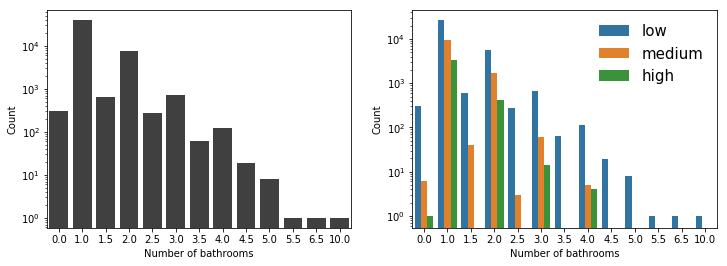

In [134]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
bathtemp = train['bathrooms'].value_counts()
sns.barplot(bathtemp.index, bathtemp.values, alpha=0.75, 
            ax=ax1, color='black', log=True)
ax1.set_xlabel('Number of bathrooms')
ax1.set_ylabel('Count')
sns.countplot(data=train, x='bathrooms', log=True,
              hue='interest_level', 
              hue_order=['low','medium','high'], ax=ax2)
ax2.set_xlabel('Number of bathrooms')
ax2.set_ylabel('Count')
plt.legend(frameon=False, loc='upper right', prop={'size':15})
plt.plot()

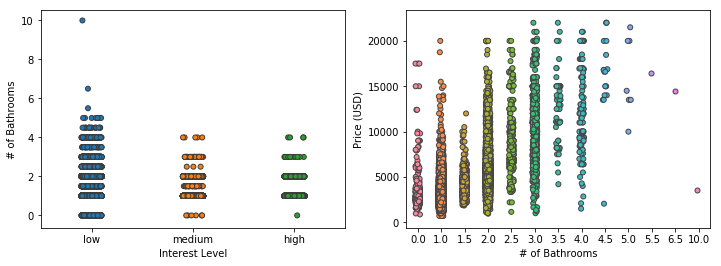

In [100]:
# Let's look at it differently, possibly gain more insight
f, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))

sns.stripplot(train["interest_level"],train["bathrooms"], 
              order=['low','medium','high'],
              jitter=True, linewidth=1, ax=ax1)
ax1.set_xlabel('Interest Level')
ax1.set_ylabel('# of Bathrooms')

sns.stripplot(train["bathrooms"],train["price"], 
              jitter=True, linewidth=1, ax=ax2)
ax2.set_xlabel('# of Bathrooms')
ax2.set_ylabel('Price (USD)')
plt.show()

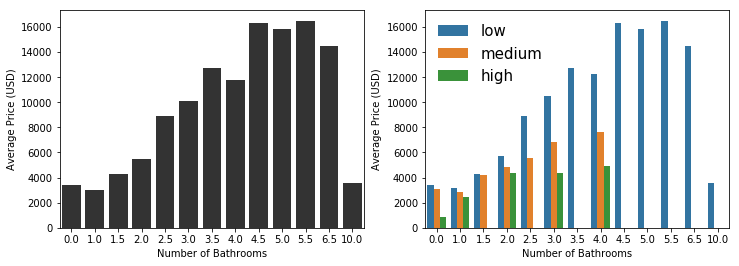

In [101]:
# Let's average the previous right-panel plot
f, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
dbath=train[['price','bathrooms']].groupby(['bathrooms'], as_index=False).mean()
sns.barplot(dbath['bathrooms'], dbath['price'], 
            color='black', alpha=0.8, ax=ax1)
ax1.set_xlabel("Number of Bathrooms")
ax1.set_ylabel('Average Price (USD)')

dbath1=train[['price','bathrooms','interest_level']].groupby(['bathrooms','interest_level'], as_index=False).mean()
sns.barplot(data=dbath1, x='bathrooms',y='price',
            hue='interest_level', 
            hue_order=['low','medium','high'], ax=ax2)
ax2.set_xlabel('Number of Bathrooms')
ax2.set_ylabel('Average Price (USD)')
plt.legend(frameon=False, loc='upper left', prop={'size':15})
plt.show()

## Bathroom Comments:
* Rare interest in a listing with no bathrooms (is this a mistake or a fradulent listing? I do not understand why someone would rent an apartment with no full bathrooms, esp in NYC)
* **Highest interest in listings with 1-2 full baths**, lower interest when a half bathroom is introduced. In fact, **there are no high interest listings for half-bath listings**
* Little interest when a listing has more than 3 bathrooms
* Similar arguments as bedrooms wrt to price, namely we expect the average price to rise as the number of bathrooms increases; however, **the average price for high interest listings remains flat for >2 bathrooms (low statistics here though, an error bar would be helpful)**
* Low interest level listings have drastically larger pricings; therefore, we expect high interest in listings with a fair and reasonable asking price

## Listing ID <a class="anchor" id="listID"></a>

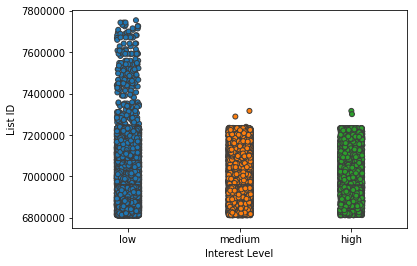

In [102]:
f, ax1 = plt.subplots(figsize=(6,4))
sns.stripplot(train["interest_level"],train["listing_id"], 
              jitter=True, linewidth=1, 
              order=['low','medium','high'],ax=ax1)
ax1.set_xlabel('Interest Level')
ax1.set_ylabel('List ID')
plt.show()

### List ID Comments:
* Medium and high interest listings obey some threshold that I currently do not understand
* Naively, I would assume that ListID is simply some automated indexing device, perhaps it is related to the time that the listing was posted? 
* I'd like to understand this more, correlate it with time or management

# Feature Engineering <a class="anchor" id="feature_engineer"></a>
* We have a great deal of information to use, lets add some features and then check for correlations. 
* As a first pass, let's simply aggregate information in the simplest possible way

In [103]:
photos = train["photos"].values
print("Example of photos: shape, # of photos %d, %d" % (photos.shape[0], len(photos[0])))

Example of photos: shape, # of photos 49253, 5


In [104]:
# Just aggregate info, do not even look at the contents
train["num_photos"] = train["photos"].apply(len)
train["num_features"] = train["features"].apply(len)
train["num_description_words"] = train["description"].apply(lambda x: len(x.split(" ")))

# Take a look at the date
train["created"] = pd.to_datetime(train["created"])
train["created_year"] = train["created"].dt.year
train["created_month"] = train["created"].dt.month
train["created_day"] = train["created"].dt.day
train["created_hour"] = train["created"].dt.hour

## Number of Listing Photographs <a class="anchor" id="photos"></a>

In [105]:
train['num_photos'].loc[train['num_photos']>25] = 25

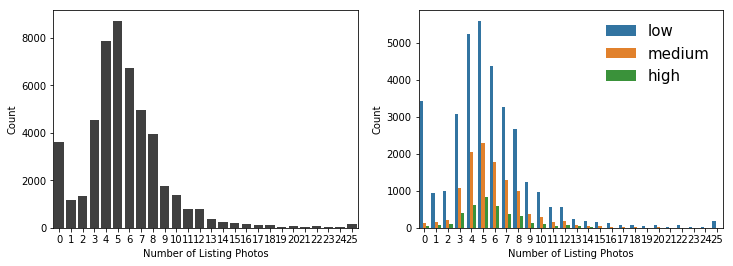

In [106]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))

phototemp = train['num_photos'].value_counts()
sns.barplot(phototemp.index, phototemp.values, alpha=0.75, color='black',ax=ax1)
ax1.set_xlabel("Number of Listing Photos")
ax1.set_ylabel('Count')

sns.countplot(data=train, x='num_photos', hue='interest_level',
           ax=ax2, hue_order=['low','medium','high'])
ax2.set_xlabel("Number of Listing Photos")
ax2.set_ylabel('Count')
ax2.legend(frameon=False, loc='upper right', prop={'size':15})
plt.show()

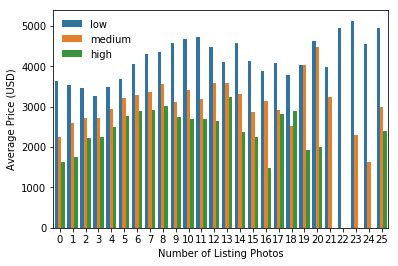

In [107]:
# Let's average the previous right-panel plot
dphoto=train[['price','num_photos','interest_level']].groupby(['num_photos','interest_level'], as_index=False).mean()
sns.barplot(data=dphoto, x='num_photos',y='price',
            hue='interest_level', hue_order=['low','medium','high'])
plt.xlabel('Number of Listing Photos')
plt.ylabel('Average Price (USD)')
plt.legend(frameon=False, loc='upper left', prop={'size':10})
plt.show()

### Photo Comments:
* We see that these number of photograph histograms follow roughly the same pattern for all interest levels up to ~15 photographs
* **Optimal number of photos is in the 3-8 range (5$\pm$1 is best)**
* **Zero photographs is a huge negative**
* There really is no need for >30 photographs, and should be regarded as a quality vs. quantity.
* There is a small positive correlation between the number of photos and the average price up to roughly 8 photos.
* Some listings have >50 photographs, lets cap this at 10 - 20 (will play with this later)

## Number of Listing Features <a class="anchor" id="list_features"></a>

In [108]:
train['num_features'].loc[train['num_features']>20] = 20

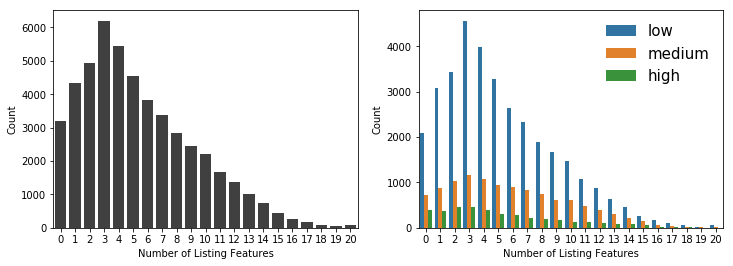

In [109]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))

feattemp = train['num_features'].value_counts()
sns.barplot(feattemp.index, feattemp.values, alpha=0.75, color='black',ax=ax1)
ax1.set_xlabel("Number of Listing Features")
ax1.set_ylabel('Count')

sns.countplot(data=train, x='num_features', hue='interest_level',
           ax=ax2, hue_order=['low','medium','high'], log=False)
ax2.set_xlabel("Number of Listing Features")
ax2.set_ylabel('Count')
ax2.legend(frameon=False, loc='upper right', prop={'size':15})
plt.show()

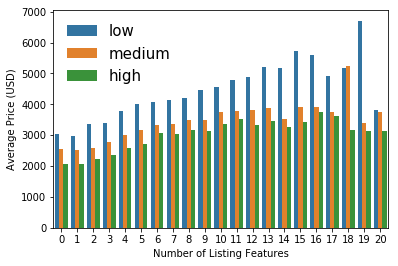

In [110]:
dphoto=train[['price','num_features','interest_level']].groupby(['num_features','interest_level'], as_index=False).mean()
sns.barplot(data=dphoto, x='num_features',y='price',
            hue='interest_level', hue_order=['low','medium','high'])
plt.xlabel('Number of Listing Features')
plt.ylabel('Average Price (USD)')
plt.legend(frameon=False, loc='upper left', prop={'size':15})
plt.show()

### Comments on Listing Features
* There are listings with >30 features listed; again, this should be regarded as a quality vs. quantity issue in which only essential items are presented.
* **High interest listings are relatively insensitive to this feature up to around 5 features**, and then the interest begins to decrease; medium interest is maxed around 3 features.
* I would argue that 2-4 listing features is optimal, though.
* There are medium/high interest listings with zero listing features.
* Average price roughly increases with the number of listing features, which may be an indicator that more expensive listings simply have more features...

## Listing Hour <a class="anchor" id="listing_hour"></a>

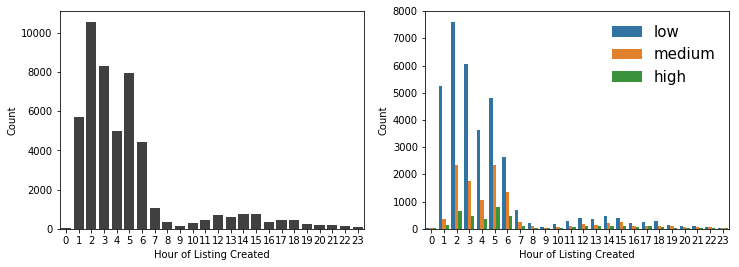

In [111]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))

hrtemp = train['created_hour'].value_counts()
sns.barplot(hrtemp.index, hrtemp.values, alpha=0.75, color='black',ax=ax1)
ax1.set_xlabel("Hour of Listing Created")
ax1.set_ylabel('Count')

sns.countplot(data=train, x='created_hour', hue='interest_level',
           ax=ax2, hue_order=['low','medium','high'])
ax2.set_xlabel("Hour of Listing Created")
ax2.set_ylabel('Count')
ax2.legend(frameon=False, loc='upper right', prop={'size':15})
plt.show()

## Number of Descriptive Words <a class="anchor" id="descriptive"></a>
* I do not like this feature, maybe if it was stemmed properly.
* The distribution is quite large
* Will come back to this

In [112]:
temp = train["num_description_words"].values
print(train["description"].iloc[3])

Building Amenities - Garage - Garden - fitness room - laundry room -rooftop deck .<br /><br />Located in midtown East - High energy area - plenty of Bars and restaurants to choose from - within walking distance to the transit E,M,6,7<br /><br />This Apartment also feature a renovated kitchen with microwave - Marble Bath tiles.<br /><br />Call or Email and Text for Exclusive Showing!!<br /><br />**NO FEE**<br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><p><a  website_redacted 


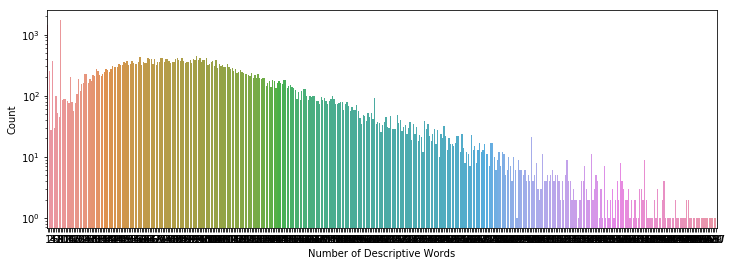

In [113]:
# Let's average the previous right-panel plot
f, ax1 = plt.subplots(figsize=(12,4))
sns.countplot(data=train, x='num_description_words', 
              ax=ax1, log=True)
ax1.set_xlabel("Number of Descriptive Words")
ax1.set_ylabel('Count')
plt.show()

In [114]:
train['num_description_words'].loc[train['num_description_words']>1000] = 1000

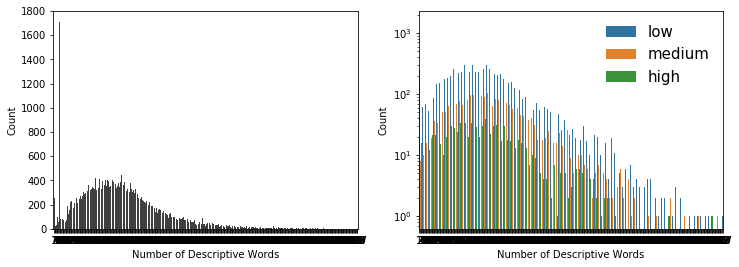

In [115]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))

destemp = train['num_description_words'].value_counts()
sns.barplot(destemp.index, destemp.values, alpha=0.75, color='black',ax=ax1)
ax1.set_xlabel("Number of Descriptive Words")
ax1.set_ylabel('Count')

sns.countplot(data=train, x='num_description_words', hue='interest_level',
           ax=ax2, hue_order=['low','medium','high'], log=True)
ax2.set_xlabel("Number of Descriptive Words")
ax2.set_ylabel('Count')
ax2.legend(frameon=False, loc='upper right', prop={'size':15})
plt.show()

In [116]:
features_to_use = ["bathrooms", "bedrooms", "latitude", 
                   "longitude", "price", "num_photos",
                   "num_features", "num_description_words",
                   "created_year", "created_month", "created_day"]

In [117]:
from sklearn import preprocessing
categorical = ["display_address", "manager_id", "building_id", "street_address"]
for f in categorical:
      if train[f].dtype=='object':
            #print(f)
            lbl = preprocessing.LabelEncoder()
            #fit both train and test together to include all unique values
            lbl.fit(list(train[f].values) + list(test[f].values))
            train[f] = lbl.transform(list(train[f].values))
            test[f] = lbl.transform(list(test[f].values))
            #features_to_use.append(f)

## Listing Managers <a class="anchor" id="managers"></a>
* Define a new feature to represent the interest level of listings by manager

In [118]:
def cat(row):
    if row['interest_level'] == 'low':
        return 0
    if row['interest_level'] == 'medium':
        return 1
    if row['interest_level'] == 'high':
        return 2
def sumrow(row):
    return row['low'] + row['medium'] + row['high'] 
def norm(row, type):
    return row[type] / row['count']

In [119]:
train['interest_cat'] = train.apply (lambda row: cat (row),axis=1)

In [120]:
# Let's group managers by the interest level of their listings
managers = train.groupby(['manager_id','interest_level']).size().unstack(fill_value=0)

In [121]:
managers.columns = ['low','medium','high']
managers['count'] = managers.apply (lambda row: sumrow (row),axis=1)

In [122]:
managers['low_frac']    = managers.apply(lambda row: norm(row,'low'), axis=1)
managers['medium_frac'] = managers.apply(lambda row: norm(row,'medium'), axis=1)
managers['high_frac']   = managers.apply(lambda row: norm(row,'high'), axis=1)

In [123]:
managers.loc[managers['count']>2000]

,low,medium,high,count,low_frac,medium_frac,high_frac
manager_id,,,,,,,
3956,172,1737,622,2531,0.067957,0.68629,0.245753


In [124]:
manager_occurences = managers['count'].values
print(-np.sort(-manager_occurences))

[2531  711  409 ...,    1    1    1]


In [125]:
managers['skill']=2*managers['high_frac']+managers['medium_frac']

In [126]:
managers.head()

,low,medium,high,count,low_frac,medium_frac,high_frac,skill
manager_id,,,,,,,,
0,0,4,8,12,0.0,0.333333,0.666667,1.666667
1,0,10,0,10,0.0,1.000000,0.000000,1.000000
2,0,1,0,1,0.0,1.000000,0.000000,1.000000
3,0,0,2,2,0.0,0.000000,1.000000,2.000000
4,0,2,1,3,0.0,0.666667,0.333333,1.333333


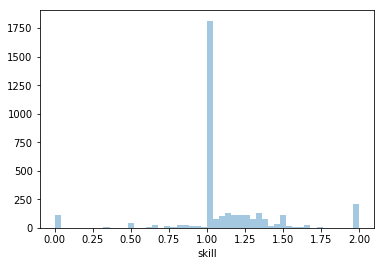

In [135]:
sns.distplot( managers.skill, kde=False, bins=50) #distplot
#plt.legend(frameon=False, loc='upper right', prop={'size':15})
#plt.xlabel('Manager Skill Level')
plt.show()

## Management Comments
* There is a high-profile manager representing a decent fraction of the training sample (~4%), and 69% (25%) of these listings fall into the medium (high) interest level category
* **Developed features to represent the managers skill level, which is defined to be the individual counts of listings by interest level normalized to the total count**
* We may need to introduce a weighting factor to account for managers with small numbers of listings

# Models

In [128]:
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import train_test_split
#from sklearn.naive_bayes import GaussianNB
#from sklearn.metrics import log_loss

In [129]:
#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,
#                                                 random_state=42)

In [130]:
#check_nulls(X_train,True)

In [131]:
#clf = RandomForestClassifier(n_estimators=2000, n_jobs=-1, max_features='sqrt', min_samples_split=5)
#clf.fit(X_train, y_train)

In [132]:
#y_val_pred = clf.predict_proba(X_val)
#print(y_val_pred) # prob to belong to each of the 3 target classes
#L_rf=log_loss(y_val, y_val_pred)
#print('Log los_rf=log_loss(y_val, y_val_pred)s = %1.3f' % L_rf)